In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C://Users//admin//Desktop//Download//Walmart_Store_sales.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Checking Null values 
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Exploratory Data Analysis

### Univariate analysis

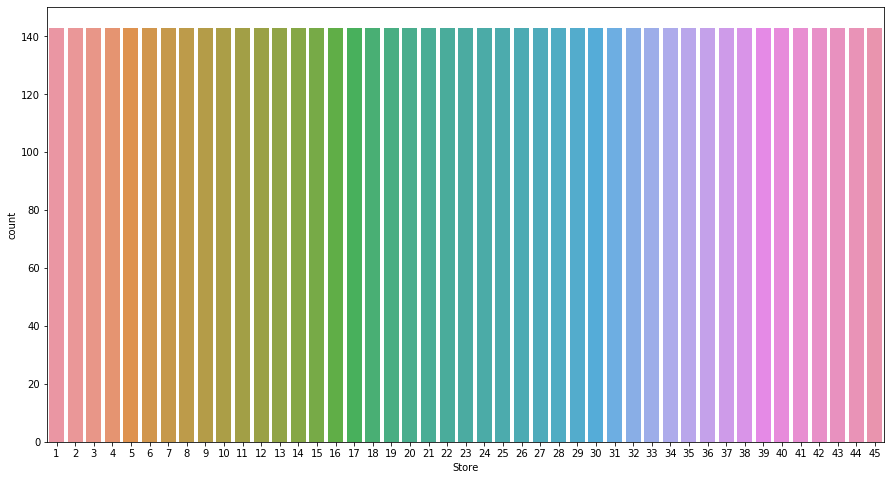

In [8]:
# How many different categories store column have ?
plt.figure(figsize=[15,8])
sns.countplot(df['Store'])

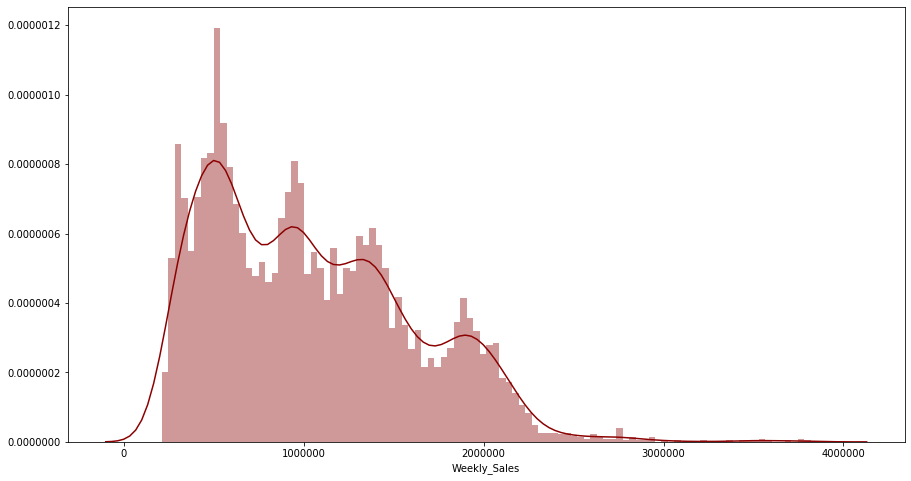

In [9]:
# how is the distribution of sales column ?
plt.figure(figsize=[15,8])
sns.distplot(df['Weekly_Sales'] , bins = 100 , color = 'darkred')

In [10]:
# Since the date column is in object data type, we are converting it to datetime.
df['Date'] = pd.to_datetime(df['Date'])

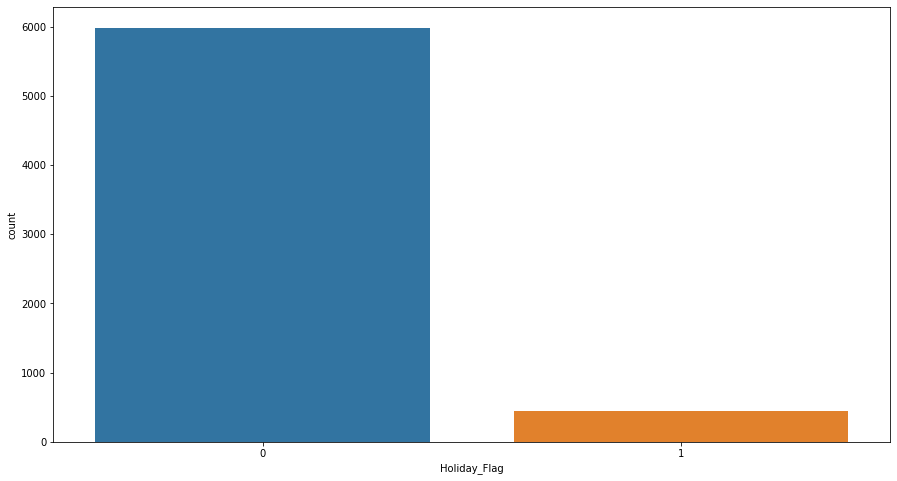

In [11]:
# Count of holiday and non holiday records
plt.figure(figsize=[15,8])
sns.countplot(df['Holiday_Flag'])

In [12]:
# When was the maximum sales ?
df[df['Weekly_Sales']==max(df['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


There is seasonality in data.

Sales are higher in month of December and January

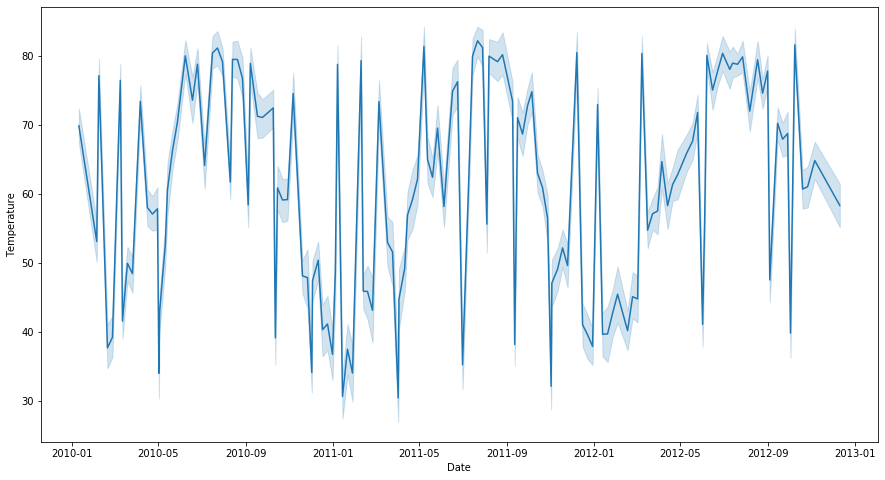

In [13]:
# Date Wise Temparature.
plt.figure(figsize=[15,8])
sns.lineplot(df['Date'] , df['Temperature'])

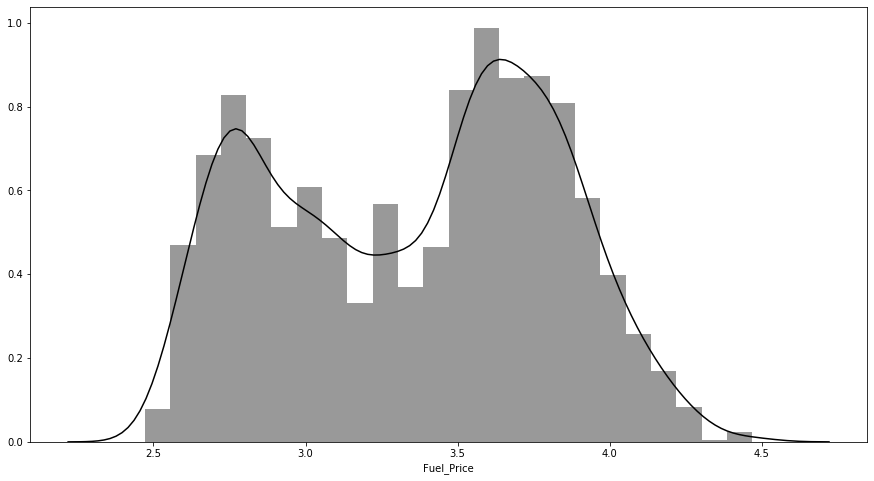

In [14]:
# Distribution of fuel price.
plt.figure(figsize=[15,8])
sns.distplot(df['Fuel_Price'] , color='k')

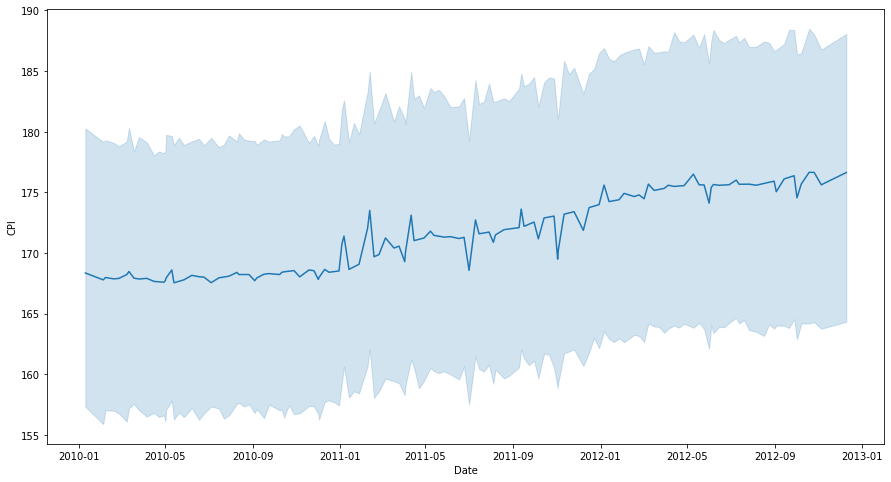

In [15]:
# Date Wise Temparature.
plt.figure(figsize=[15,8])
sns.lineplot(df['Date'] , df['CPI'])

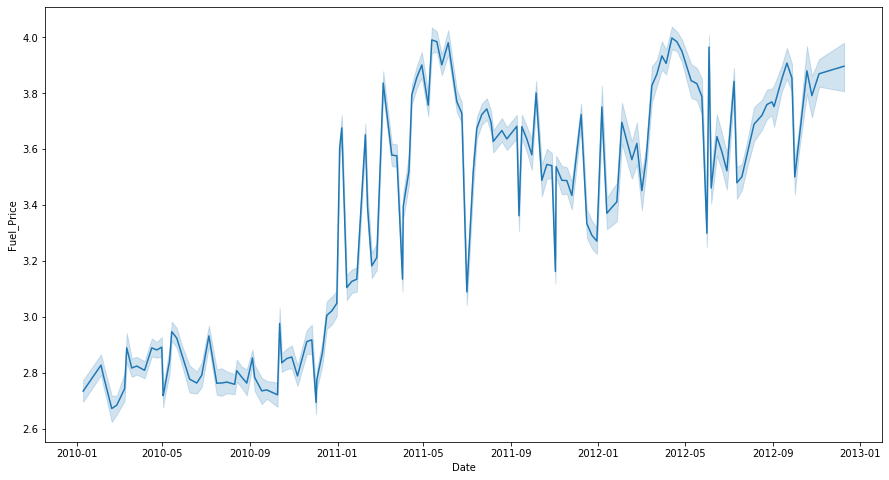

In [16]:
# Date Wise Temparature.
plt.figure(figsize=[15,8])
sns.lineplot(df['Date'] , df['Fuel_Price'])

### Bivaraite Analysis

In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


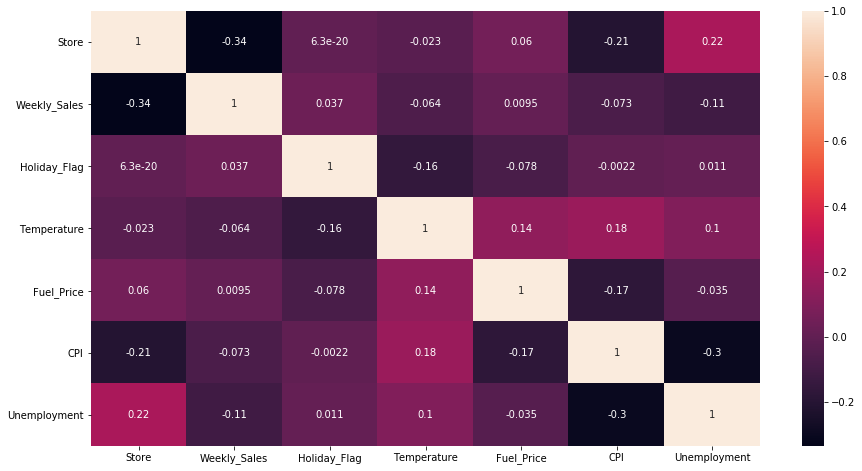

In [19]:
# Correlation plot of all features
plt.figure(figsize=[15,8])
sns.heatmap(df.corr() , annot = True)

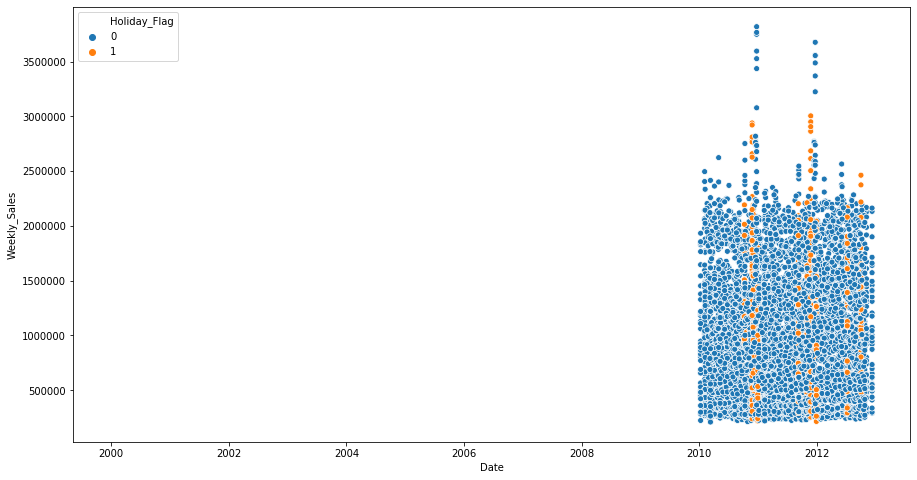

In [20]:
# Does People shop more on holidays ?
plt.figure(figsize=[15,8])
sns.scatterplot(x='Date' , y='Weekly_Sales' , hue = 'Holiday_Flag' , data = df)

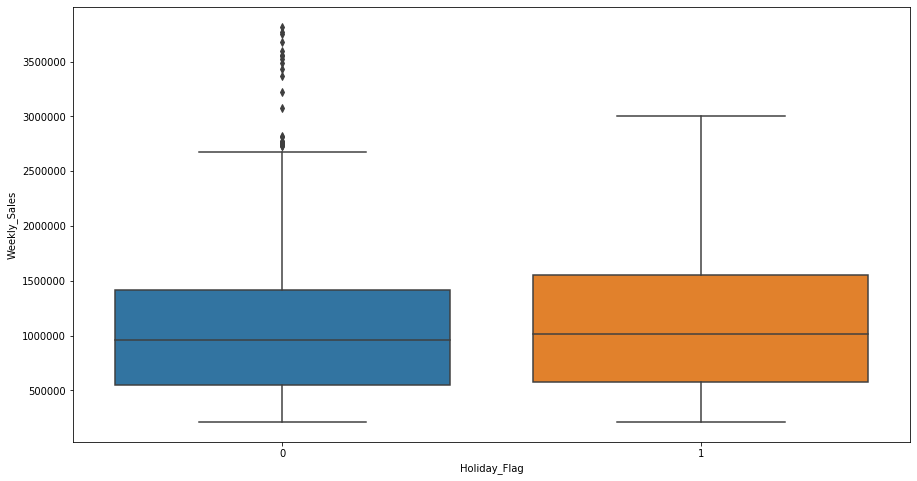

In [21]:
plt.figure(figsize=[15,8])
sns.boxplot(df['Holiday_Flag'] , df['Weekly_Sales'])

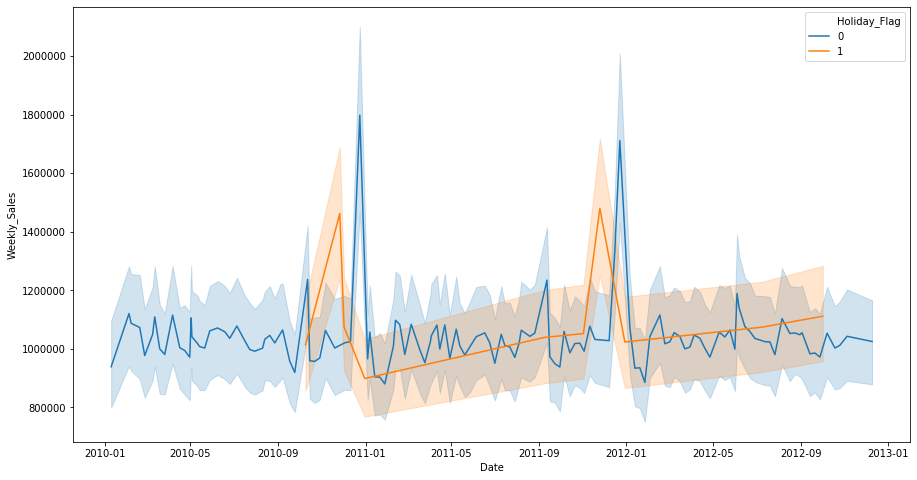

In [22]:
plt.figure(figsize=[15,8])
sns.lineplot(df['Date'] , df['Weekly_Sales'] , hue = df['Holiday_Flag'])

In [23]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

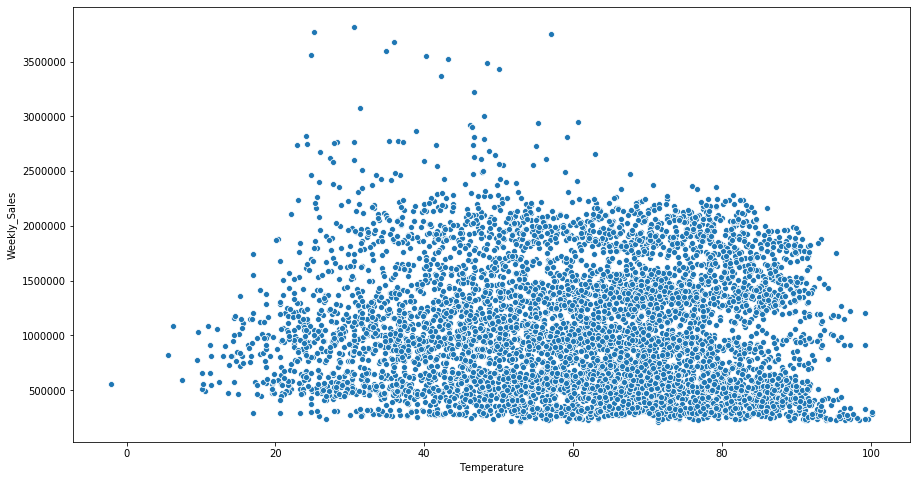

In [24]:
# Correlation of temparature with sales 
plt.figure(figsize=[15,8])
sns.scatterplot(x='Temperature' , y='Weekly_Sales' , data = df)

Optimal temparature when people prefer to go for shopping is between 25-60

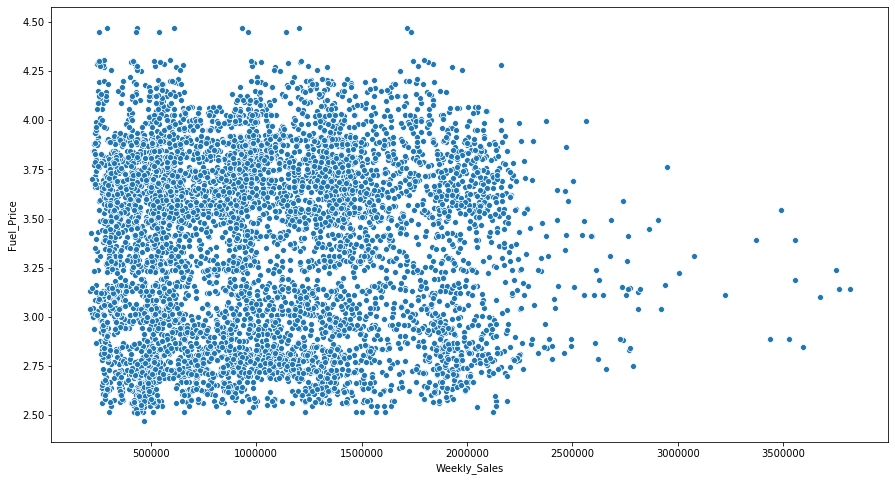

In [25]:
# Correlation of fuel price with sales 
plt.figure(figsize=[15,8])
sns.scatterplot(x='Weekly_Sales' , y='Fuel_Price' , data = df)

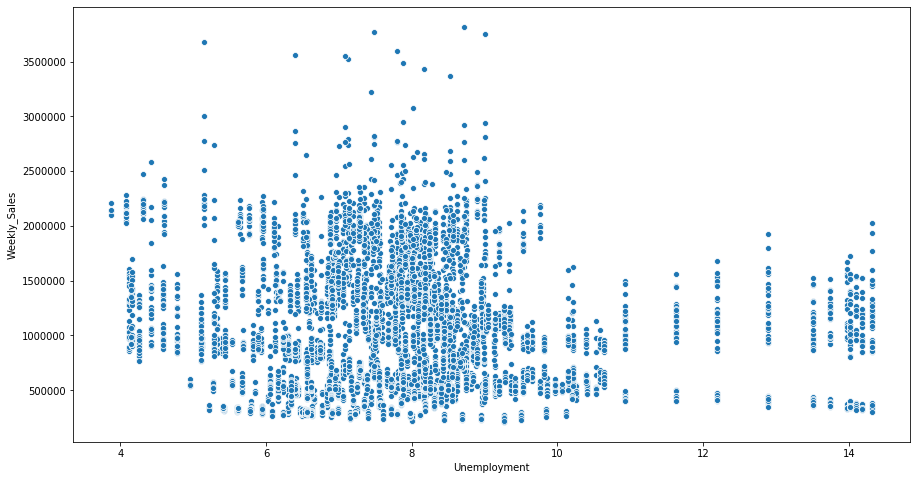

In [26]:

# Correlation of fuel price with sales 
plt.figure(figsize=[15,8])
sns.scatterplot(x='Unemployment' , y='Weekly_Sales' , data = df)

sales are less when unemployment rate is higher

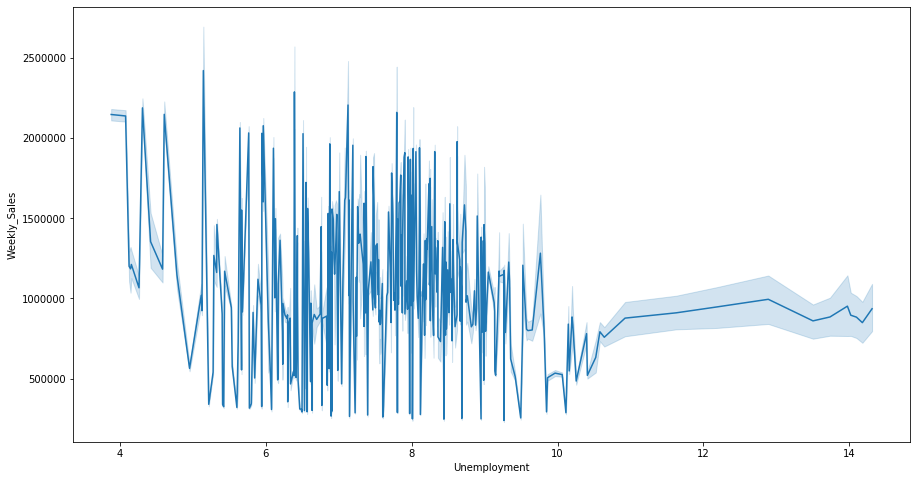

In [27]:
plt.figure(figsize=[15,8])
sns.lineplot(x='Unemployment' , y='Weekly_Sales' , data = df)

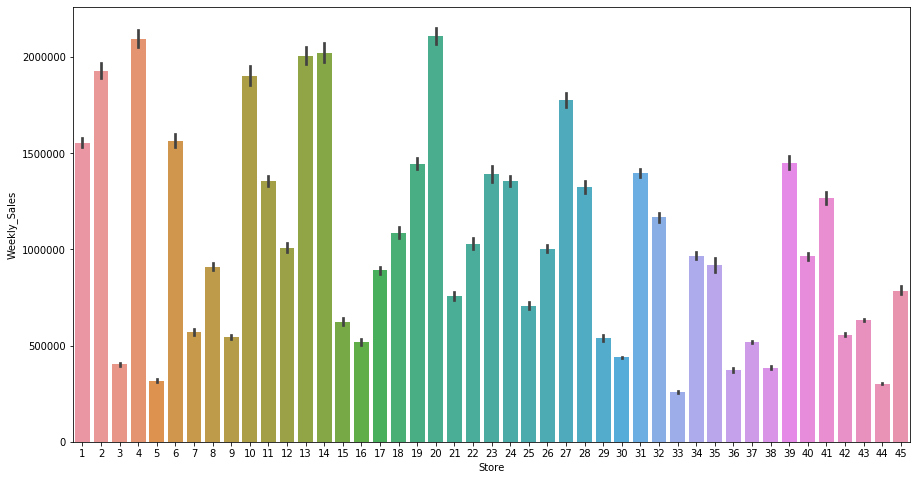

In [28]:
# Which store has maximum sales ?
plt.figure(figsize=[15,8])
sns.barplot(x=df['Store'] , y=df['Weekly_Sales'])

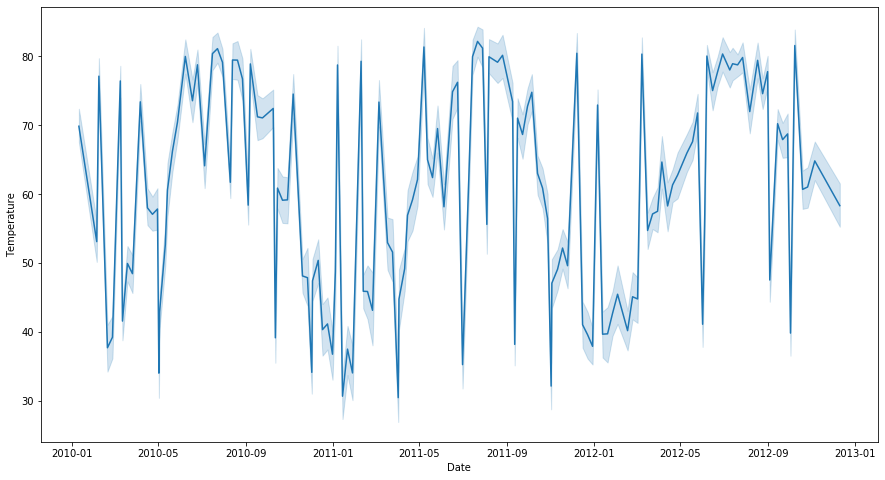

In [29]:
# Date wise temparature
plt.figure(figsize=[15,8])
sns.lineplot(df['Date'] , df['Temperature'])